In [2]:
import os
import torch
from torchtext.data import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext import transforms as T
from torch.utils.data import TensorDataset
from datasets import Dataset, DatasetDict

def read_data(path='./aclImdb', is_train=True):
    reviews, labels = [], []
    
    for label in ['pos', 'neg']:
        folder_name = os.path.join(path, 'train' if is_train else 'test', label)
        for filename in os.listdir(folder_name):
            with open(os.path.join(folder_name, filename), mode='r', encoding='utf-8') as f:
                reviews.append(f.read())
                labels.append(1 if label == 'pos' else 0)
    return reviews, labels

def convert_to_datasets_format(reviews, labels):
    return [{'text': review, 'label': label} for review, label in zip(reviews, labels)]

def create_datasets(path='./aclImdb'):
    reviews_train, labels_train = read_data(path, is_train=True)
    reviews_test, labels_test = read_data(path, is_train=False)
    
    train_data = convert_to_datasets_format(reviews_train, labels_train)
    test_data = convert_to_datasets_format(reviews_test, labels_test)
    
    train_dataset = Dataset.from_dict({'text': [data['text'] for data in train_data], 'label': [data['label'] for data in train_data]})
    test_dataset = Dataset.from_dict({'text': [data['text'] for data in test_data], 'label': [data['label'] for data in test_data]})
    
    return DatasetDict({'train': train_dataset, 'test': test_dataset})

dataset = create_datasets()
# tokenizer = get_tokenizer('basic_english')
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
})


```bash
pip install transformers datasets
```

In [3]:
from transformers import BertTokenizer

# 加载预训练的BERT分词器
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 定义一个函数，将文本数据转换为BERT模型的输入格式
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

# 对数据集进行分词处理
tokenized_datasets = dataset.map(tokenize_function, batched=True)
print(tokenized_datasets)

Map: 100%|██████████| 25000/25000 [01:22<00:00, 302.73 examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 25000
    })
})


d:\miniconda\envs\torchdata\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\周\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are ne

{'loss': 0.3439, 'grad_norm': 11.336173057556152, 'learning_rate': 1.6800000000000002e-05, 'epoch': 0.32}


                                                   
 16%|█▌        | 1000/6250 [09:57<27:35,  3.17it/s]

{'eval_loss': 0.3046461045742035, 'eval_accuracy': 0.92128, 'eval_runtime': 279.4043, 'eval_samples_per_second': 89.476, 'eval_steps_per_second': 11.185, 'epoch': 0.32}


 32%|███▏      | 2000/6250 [15:16<21:25,  3.31it/s]    

{'loss': 0.2808, 'grad_norm': 24.626283645629883, 'learning_rate': 1.3600000000000002e-05, 'epoch': 0.64}


                                                   
 32%|███▏      | 2000/6250 [19:43<21:25,  3.31it/s]

{'eval_loss': 0.2343919575214386, 'eval_accuracy': 0.9298, 'eval_runtime': 267.2937, 'eval_samples_per_second': 93.53, 'eval_steps_per_second': 11.691, 'epoch': 0.64}


 48%|████▊     | 3000/6250 [24:47<16:22,  3.31it/s]   

{'loss': 0.2547, 'grad_norm': 6.008967399597168, 'learning_rate': 1.04e-05, 'epoch': 0.96}


                                                   
 48%|████▊     | 3000/6250 [29:14<16:22,  3.31it/s]

{'eval_loss': 0.2258727103471756, 'eval_accuracy': 0.93056, 'eval_runtime': 267.2428, 'eval_samples_per_second': 93.548, 'eval_steps_per_second': 11.693, 'epoch': 0.96}


 64%|██████▍   | 4000/6250 [34:18<11:44,  3.19it/s]   

{'loss': 0.1754, 'grad_norm': 0.18547214567661285, 'learning_rate': 7.2000000000000005e-06, 'epoch': 1.28}


                                                   
 64%|██████▍   | 4000/6250 [38:46<11:44,  3.19it/s]

{'eval_loss': 0.29743692278862, 'eval_accuracy': 0.93188, 'eval_runtime': 267.2871, 'eval_samples_per_second': 93.532, 'eval_steps_per_second': 11.692, 'epoch': 1.28}


 80%|████████  | 5000/6250 [43:49<06:17,  3.31it/s]   

{'loss': 0.1444, 'grad_norm': 0.2488885521888733, 'learning_rate': 4.000000000000001e-06, 'epoch': 1.6}


                                                   
 80%|████████  | 5000/6250 [48:16<06:17,  3.31it/s]

{'eval_loss': 0.2862088978290558, 'eval_accuracy': 0.939, 'eval_runtime': 267.1552, 'eval_samples_per_second': 93.579, 'eval_steps_per_second': 11.697, 'epoch': 1.6}


 96%|█████████▌| 6000/6250 [53:19<01:15,  3.31it/s]   

{'loss': 0.1528, 'grad_norm': 0.07870084047317505, 'learning_rate': 8.000000000000001e-07, 'epoch': 1.92}


                                                   
 96%|█████████▌| 6000/6250 [58:07<01:15,  3.31it/s]

{'eval_loss': 0.24999509751796722, 'eval_accuracy': 0.93972, 'eval_runtime': 287.3801, 'eval_samples_per_second': 86.993, 'eval_steps_per_second': 10.874, 'epoch': 1.92}


100%|██████████| 6250/6250 [59:28<00:00,  1.75it/s]  


{'train_runtime': 3568.023, 'train_samples_per_second': 14.013, 'train_steps_per_second': 1.752, 'train_loss': 0.221506455078125, 'epoch': 2.0}


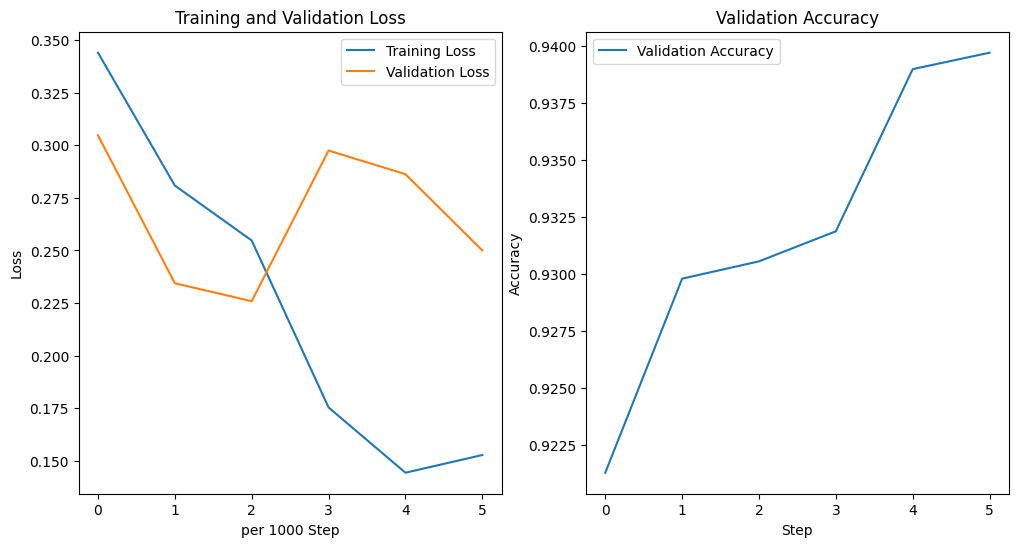

100%|██████████| 3125/3125 [04:34<00:00, 11.40it/s]

{'eval_loss': 0.2520195543766022, 'eval_accuracy': 0.94044, 'eval_runtime': 274.1489, 'eval_samples_per_second': 91.191, 'eval_steps_per_second': 11.399, 'epoch': 2.0}


In [4]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
import matplotlib.pyplot as plt

# 加载预训练的BERT模型，用于序列分类
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

class LoggingCallback(TrainerCallback):
    def __init__(self):
        self.train_losses = []
        self.eval_losses = []
        self.eval_accuracies = []
    
    def on_log(self, args, state, control, logs=None, **kwargs):
        """自定义回调函数，用于在训练和评估过程中打印日志信息。"""
        if 'loss' in logs:
            self.train_losses.append(logs.get('loss', 'N/A'))

        if 'eval_loss' in logs and 'eval_accuracy' in logs:
            self.eval_losses.append(logs.get('eval_loss', 'N/A'))
            self.eval_accuracies.append(logs.get('eval_accuracy', 'N/A'))

def train_and_evaluate(model, tokenizer, train_data, eval_data):
    logging_callback = LoggingCallback()

    # 定义训练参数
    training_args = TrainingArguments(
        output_dir='./results',                  
        eval_strategy="steps",
        eval_steps=1000,             
        learning_rate=2e-5,                      
        per_device_train_batch_size=8,           
        per_device_eval_batch_size=8,            
        num_train_epochs=2,                      
        weight_decay=0.01,                       
        save_steps=1000,                         
        save_total_limit=2,                      
        bf16=True,                               
        logging_dir='./logs',
        logging_strategy="steps",                    
        logging_steps=1000,
        optim="adamw_torch"                    
    )


    # 定义Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_data,
        eval_dataset=eval_data,
        compute_metrics=lambda p: {'accuracy': (p.predictions.argmax(-1) == p.label_ids).mean()},
        callbacks=[logging_callback]  # 添加自定义回调
    )

    # 训练模型
    trainer.train()

    
    # 绘制损失曲线
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(logging_callback.train_losses, label='Training Loss')
    plt.plot(logging_callback.eval_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('per 1000 Step')
    plt.ylabel('Loss')
    plt.legend()

    # 绘制准确率曲线
    plt.subplot(1, 2, 2)
    plt.plot(logging_callback.eval_accuracies, label='Validation Accuracy')
    plt.title('Validation Accuracy')
    plt.xlabel('Step')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    # 评估模型并打印结果
    eval_result = trainer.evaluate()
    print(eval_result)


train_and_evaluate(model, tokenizer, tokenized_datasets['train'], tokenized_datasets['test'])

### 测试模型

In [5]:
import torch
model = BertForSequenceClassification.from_pretrained('./results/checkpoint-6000')  # 请替换为实际的checkpoint路径

# 定义测试函数
def predict_sentences(model, tokenizer, sentences):
    inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    return predictions

# 定义测试的句子
test_sentences = [
    "The movie was fantastic and I enjoyed every moment.",
    "I did not like the food at the restaurant.",
    "The book was boring and I could not finish it.",
    "The weather today is sunny and pleasant.",
    "I am not feeling well today.",
    "The team played really well and won the match.",
    "This is the worst product I have ever bought.",
    "The customer service was very helpful and polite.",
    "I am excited for the upcoming vacation.",
    "The traffic was terrible during rush hour."
]

# 使用模型进行预测
predicted_labels = predict_sentences(model, tokenizer, test_sentences)

# 打印预测结果
for sentence, label in zip(test_sentences, predicted_labels):
    print(f"Sentence: {sentence}\nPredicted Label: {label.item()}\n")

Sentence: The movie was fantastic and I enjoyed every moment.
Predicted Label: 1

Sentence: I did not like the food at the restaurant.
Predicted Label: 0

Sentence: The book was boring and I could not finish it.
Predicted Label: 0

Sentence: The weather today is sunny and pleasant.
Predicted Label: 1

Sentence: I am not feeling well today.
Predicted Label: 0

Sentence: The team played really well and won the match.
Predicted Label: 1

Sentence: This is the worst product I have ever bought.
Predicted Label: 0

Sentence: The customer service was very helpful and polite.
Predicted Label: 1

Sentence: I am excited for the upcoming vacation.
Predicted Label: 1

Sentence: The traffic was terrible during rush hour.
Predicted Label: 0

